<a href="https://colab.research.google.com/github/7ZXU/nlp-with-pytorch/blob/main/chapter3/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 퍼셉트론: 가장 간단한 신경망

In [ ]:
import numpy as np
import torch
import torch.nn as nn

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

### 코드 3-1

In [ ]:
class Perceptron(nn.Module):
    """
    퍼셉트론은 하나의 선형 층입니다
    """
    
    def __init__(self, input_dim):
        """
        매개변수:
            input_dim (int): 입력 특성의 크기
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """퍼셉트론의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)입니다.
        반환값:
            결과 텐서. tensor.shape는 (batch,)입니다.
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

# 3.2 활성화 함수 

## 3.2.1 시그모이드

### 코드 3-2

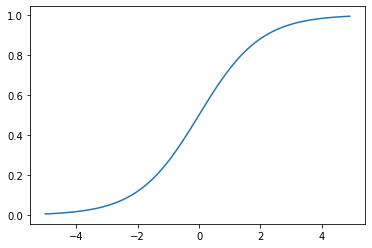

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## 3.2.2 하이퍼볼릭 탄젠트

### 코드 3-3

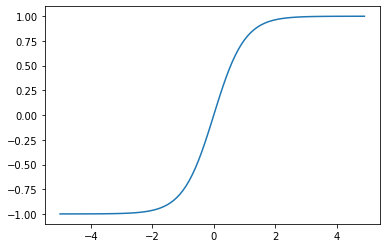

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## 3.2.3 렐루

### 코드 3-4

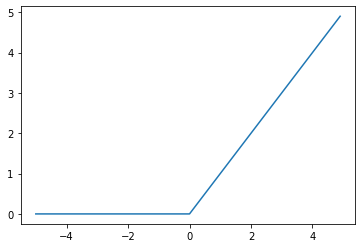

In [ ]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-5

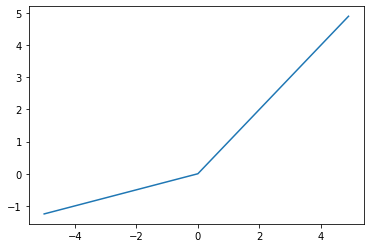

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

prelu = nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## 3.2.4 소프트맥스

### 코드 3-6

In [ ]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-2.0260, -2.0655, -1.2054]])
tensor([[0.2362, 0.2271, 0.5367]])
tensor([1.])


# 3.3 손실 함수

## 3.3.1 평균 제곱 오차 손실

### 코드 3-7

In [ ]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
loss.backward()
print(loss)

tensor(1.6031, grad_fn=<MseLossBackward>)


## 3.3.2 범주형 크로스 엔트로피 손실

### 코드 3-8

In [ ]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
loss.backward()
print (loss)

tensor(2.5949, grad_fn=<NllLossBackward>)


## 3.3.3 이진 크로스 엔트로피 손실

### 코드 3-9

In [ ]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(probabilities)

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()
print(loss)

tensor([[0.7411],
        [0.5622],
        [0.8286],
        [0.6569]], grad_fn=<SigmoidBackward>)
tensor(0.5958, grad_fn=<BinaryCrossEntropyBackward>)


# 3.4 지도 학습 훈련 알아보기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## 설정

## 모델 정의

In [ ]:
class Perceptron(nn.Module):
    """ 퍼셉트론은 하나의 선형 층입니다 """

    def __init__(self, input_dim):
        """
        매개변수: 
            input_dim (int): 입력 특성의 크기
        """
        # 2차원 데이터를 넣게 되므로 input_dim = 2
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """퍼셉트론의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)입니다.
        반환값:
            결과 텐서. tensor.shape는 (batch,)입니다.
        """
        # 활성화 함수는 시그모이드 사용
        return torch.sigmoid(self.fc1(x_in))

## 데이터 생성 함수

In [ ]:
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)

In [ ]:
def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    # 초기화
    x_data = []
    y_targets = np.zeros(batch_size)

    # 배치 사이즈만큼 반복
    for batch_i in range(batch_size):
        
        # np.random.normal
        # 정규분포로부터 난수 반환
        # loc : 평균 

        # np.random.random
        # 0~1 사이의 난수 반환 

        # 반환된 난수가 0.5 보다 크면 
        # left-center 을 평균값으로 하는 정규분포의 값을 x 데이터로 반환한다

        # decision boundary : 0.5 로 설정하여 이를 기준으로 클래스를 분류한다
        # 0.5 보다 크면 클래스 0
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        
        # 0.5 보다 작으면 클래스 1
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    
    # 배치 사이즈만큼 만들어진 x, y 데이터를 tensor 로 변환하여 반환
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

## 결과 시각화 함수

In [ ]:
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None, epoch=None, 
                      title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']):
    
    # 0.5 보다 크면 1 저장
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]
    
    colors = ['black', 'white']
    markers = ['o', '*']
    
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        # 라벨값과 예측값이 동일한 경우 
        if y_pred_i == y_true_i:
            #  white 색상
            all_colors[y_true_i].append("white")
        else:
            # 라벨값과 예측값이 다른 경우 
            # black 색상
            all_colors[y_true_i].append("black")

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))

    # 예측값과 라벨값이 동일한 여부에 따라 색 칠함    
    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)

    # decision boundary # 결정 경계 
    xlim = (min([x_list[:,0].min() for x_list in all_x]), 
            max([x_list[:,0].max() for x_list in all_x]))
            
    ylim = (min([x_list[:,1].min() for x_list in all_x]), 
            max([x_list[:,1].max() for x_list in all_x]))        

    # 클래스 나누는 선 그리기 
    xx = np.linspace(xlim[0], xlim[1], 30) # min, max # 30개의 간격으로 나눈 1차원 배열 반환
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx) #
    xy = np.vstack([XX.ravel(), YY.ravel()]).T 
    # np.ravel # 행 방향으로 합쳐서 하나의 배열 반환 
    # np.vtack # 배열 위 아래로 붙이기
    
    # Z 예측값
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    # XX, YY로 그려진 평면에 Z 를 표시한다
    # ax.contour 은 등고선을 그리는 그래프인데
    # 같은 Z 값을 가지는 점끼리 이어서 그 경계선을 표시한다
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)    
    
    plt.suptitle(title)
    
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

## 초기 데이터 시각화

In [ ]:

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# get_toy_data # 예제 데이터 만드는 함수
# x_data, y_truth : 모두 2차원이므로 [ , ] 형태의 데이터
x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors =  []

for x_i, y_true_i in zip(x_data, y_truth):
    color = 'black'

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

In [ ]:
# list를 array로 변환해서 반환
left_x = np.stack(left_x)
right_x = np.stack(right_x)

In [ ]:
left_x

array([[4.4252915, 2.720536 ],
       [1.9017311, 1.183799 ],
       [2.3004773, 3.5829628],
       ...,
       [2.9752617, 3.5538764],
       [2.1145086, 3.4653246],
       [2.7091465, 3.0747166]], dtype=float32)

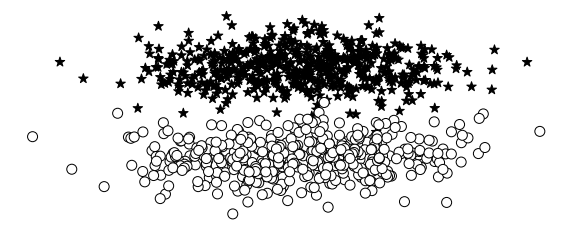

In [ ]:
# fig, ax = plt.subplots()
_, ax = plt.subplots(1, 1, figsize=(10,4))

# ax.scatter
# x좌표와 y좌표에 반복적인 값을 받는다
# [:, 0] x좌표 
# [:, 1] y좌표
# color 는 기본적으로 black으로 설정되어 있다
# s 마커크기 
ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker='*', s=100)
ax.scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor=right_colors, marker='o', s=100)

plt.axis('off');

## 훈련 중간 데이터 그래프

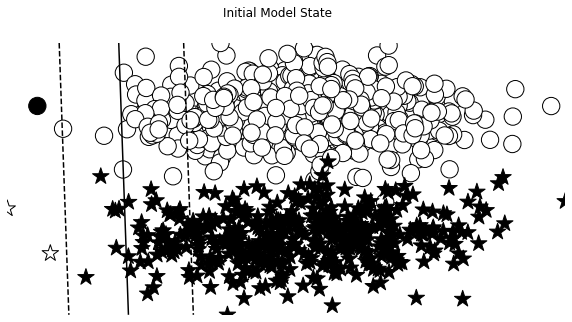

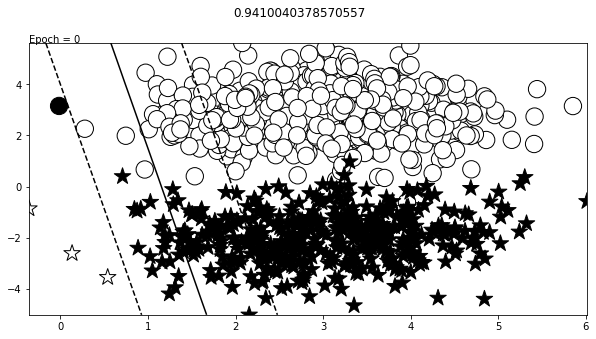

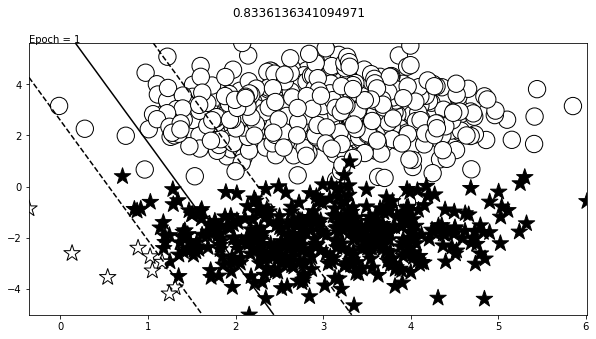

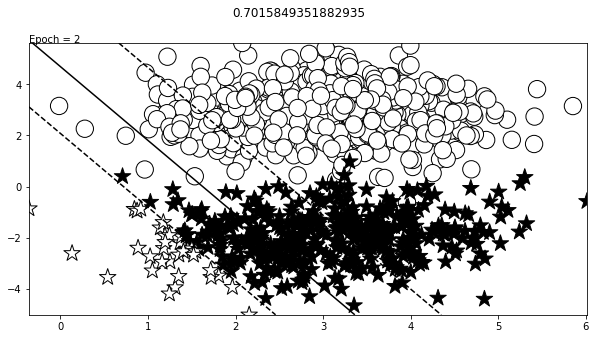

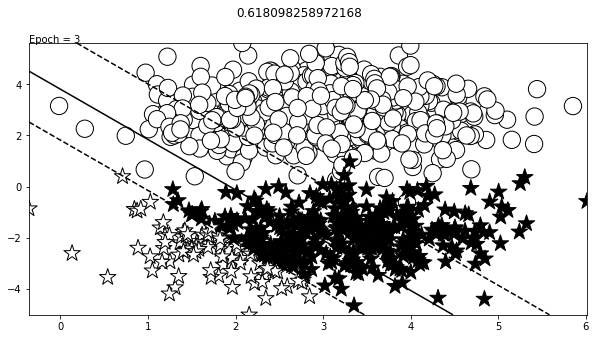

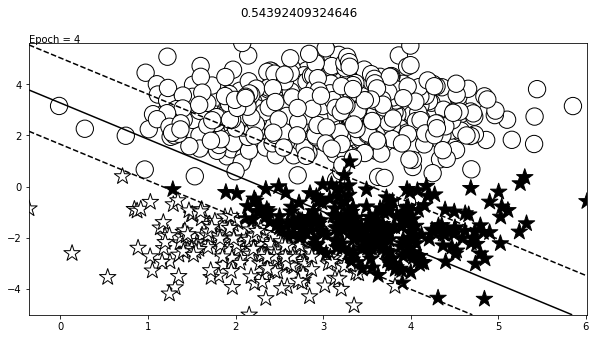

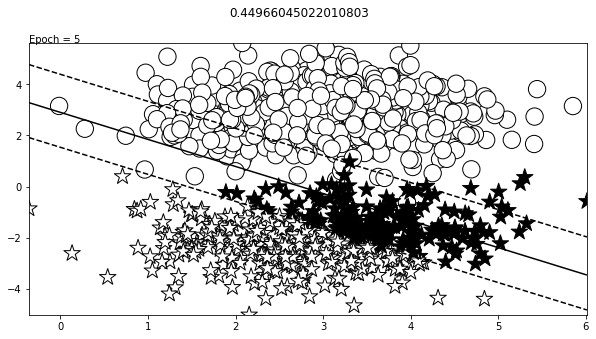

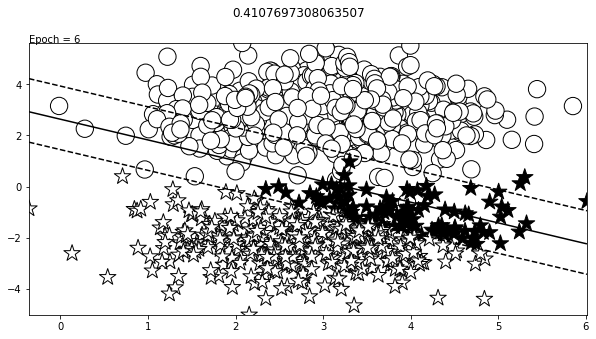

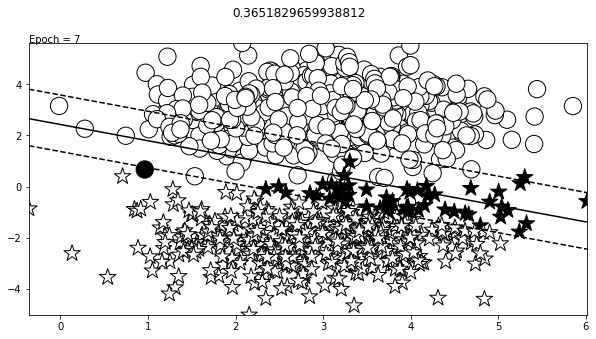

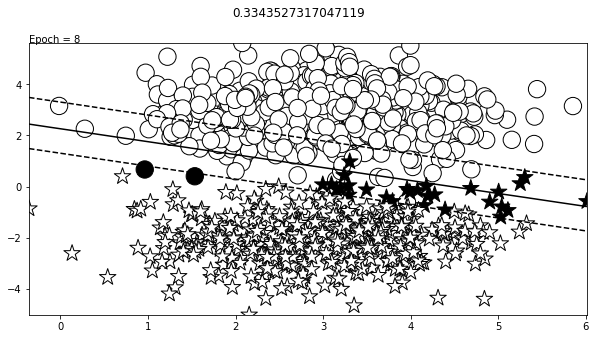

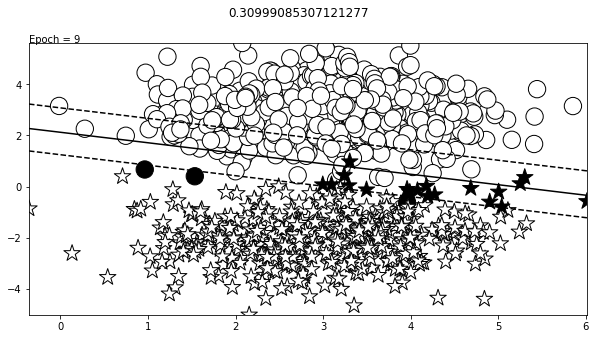

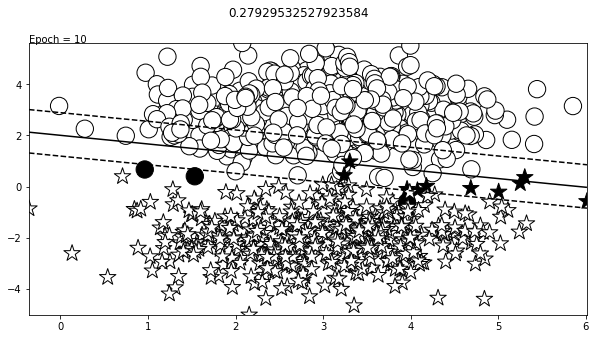

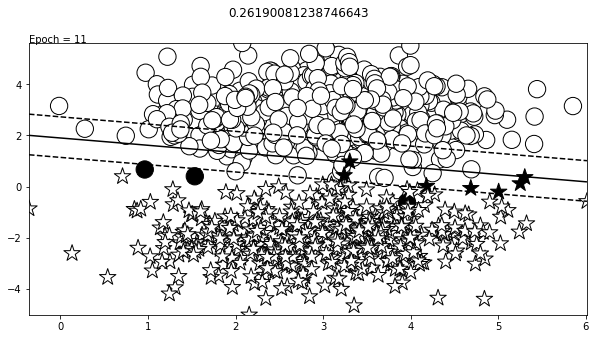

In [ ]:
# 하이퍼 파라미터 설정
## 학습률
lr = 0.01

batch_size = 1000
n_epochs = 12
n_batches = 5
input_dim = 2

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# 3.4.2 모델 선택
perceptron = Perceptron(input_dim=input_dim)

# 3.4.4 손실 함수 선택
# 다중 분류 + 확률 출력 # 크로스 엔트로피

# binary cross entropy
# 이진 분류에 적합
bce_loss = nn.BCELoss()

# 3.4.5 옵티마이저 선택
# 옵티마이저의 역할 : 설정된 학습률에 따라 가중치 업데이트
# adam 사용
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

losses = []

# 데이터 생성
x_data_static, y_truth_static = get_toy_data(batch_size)
# 시각화 평면 설정
fig, ax = plt.subplots(1, 1, figsize=(10,5))
# 시각화 함수 초기화
visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, title='Initial Model State')  
plt.axis('off')

# 훈련
for epoch in range(n_epochs):
    # 한 번의 epoch 당
    # n_bathces 횟수만큼 batch_size 만큼의 데이터 가져옴
    for _ in range(n_batches):

        # 데이터 가져오기
        x_data, y_target = get_toy_data(batch_size)

        # 그레디언트 초기화
        optimizer.zero_grad()

        # 정방향 계산
        y_pred = perceptron(x_data).squeeze()

        # 손실 계산
        loss = bce_loss(y_pred, y_target)

        # 역방향 계산 # 그래디언트 계산
        loss.backward()

        # 옵티마이저가 그래디언트 업데이트할 방법을 정해 가중치를 업데이트
        optimizer.step()
        
        loss_value = loss.item() # loss는 (1,) tensor 이기 때문에 .item() 을 통해서 스칼라 값을 가져옴
        losses.append(loss_value)
               
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, epoch=epoch, 
                      title=f"{loss_value}")

    epoch += 1


훈련을 거듭할수록 loss 값이 줄어들고 

decision boundary 가 정확히 그려지는 것을 확인할 수 있다.

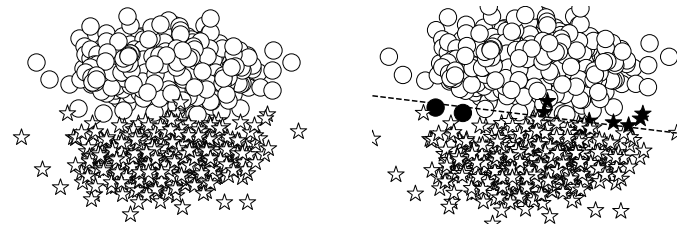

In [ ]:
_, axes = plt.subplots(1,2,figsize=(12,4))

# 왼쪽은 원래 데이터를 시각화해서 나타낸 것이고 
axes[0].scatter(left_x[:, 0], left_x[:, 1], facecolor='white',edgecolor='black', marker='o', s=300)
axes[0].scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor='black', marker='*', s=300)
axes[0].axis('off');

# 오른쪽은 결정경계를 표시해서 나타낸 그래프이다
visualize_results(perceptron, x_data_static, y_truth_static, epoch=None, levels=[0.5], ax=axes[1])
axes[1].axis('off');

이를 통해 랜덤으로 

레이블된 데이터를 생성하고 

모델 학습을 통해 그를 분류하는 decision boundary를 그려보는 연습을 했다

# 3.5 부가적인 훈련 개념

# 3.6 예제: 레스토랑 리뷰 감성 분류하기

## 3.6.1 옐프 리뷰 데이터셋

In [2]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace

In [ ]:
# 데이터 다운로드
!mkdir data
!wget https://git.io/JtRSq -O data/download.py
!wget https://git.io/JtRSO -O data/get-all-data.sh
!chmod 755 data/get-all-data.sh
%cd data
!./get-all-data.sh
%cd ..

mkdir: cannot create directory ‘data’: File exists
--2021-09-12 06:19:39--  https://git.io/JtRSq
Resolving git.io (git.io)... 54.157.58.70, 54.162.128.250, 18.205.36.100, ...
Connecting to git.io (git.io)|54.157.58.70|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/nlp-with-pytorch/main/chapter_3/data/download.py [following]
--2021-09-12 06:19:40--  https://raw.githubusercontent.com/rickiepark/nlp-with-pytorch/main/chapter_3/data/download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1572 (1.5K) [text/plain]
Saving to: ‘data/download.py’

data/download.py    100%[===================>]   1.54K  --.-KB/s    in 0s      

2021-09-12 06:19:40 (18.5 MB/s) - ‘data/download.py’ saved [1

In [ ]:
args = Namespace(
    raw_train_dataset_csv="data/yelp/raw_train.csv",
    raw_test_dataset_csv="data/yelp/raw_test.csv",
    proportion_subset_of_train=0.1,
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="data/yelp/reviews_with_splits_lite.csv",
    seed=1337
)

In [ ]:
# 원본 데이터를 reviews 변수에 읽어주고 
# column 명을 rating, review로 지정한다
reviews = pd.read_csv(args.raw_train_dataset_csv, header=None, names=['rating', 'review'])
len(reviews)

560000

In [ ]:
reviews

rating                                             review
0            1  Unfortunately, the frustration of being Dr. Go...
1            2  Been going to Dr. Goldberg for over 10 years. ...
2            1  I don't know what Dr. Goldberg was like before...
3            1  I'm writing this review to give you a heads up...
4            2  All the food is great here. But the best thing...
...        ...                                                ...
559995       2  Ryan was as good as everyone on yelp has claim...
559996       2  Professional \nFriendly\nOn time AND affordabl...
559997       1  Phone calls always go to voicemail and message...
559998       1  Looks like all of the good reviews have gone t...
559999       2  Ryan Rocks! I called him this morning for some...

[560000 rows x 2 columns]

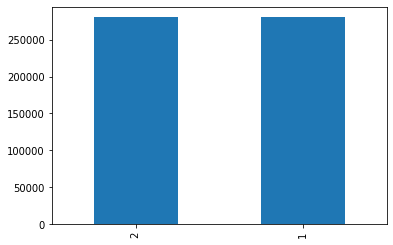

In [ ]:
reviews['rating'].value_counts().plot(kind='bar')

In [ ]:
reviews.rating.value_counts()

2    280000
1    280000
Name: rating, dtype: int64

defaultdict 다루기


---



In [ ]:
dict = collections.defaultdict(list)
dict

defaultdict(list, {})

In [ ]:
review=reviews.iloc[0]
review

rating                                                    1
review    Unfortunately, the frustration of being Dr. Go...
Name: 0, dtype: object

In [ ]:
dict[review.rating].append(review)
dict

defaultdict(list,
            {1: [rating                                                    1
              review    Unfortunately, the frustration of being Dr. Go...
              Name: 0, dtype: object]})

In [ ]:
review2= reviews.iloc[8]
review2

rating                                                    2
review    Before I finally made it over to this range I ...
Name: 8, dtype: object

In [ ]:
dict[review2.rating].append(review2)
dict

defaultdict(list,
            {1: [rating                                                    1
              review    Unfortunately, the frustration of being Dr. Go...
              Name: 0, dtype: object],
             2: [rating                                                    2
              review    Before I finally made it over to this range I ...
              Name: 8, dtype: object]})

In [ ]:
review3= reviews.iloc[16]
review3

rating                                                    1
review    Used to go there for tires, brakes, etc.  Thei...
Name: 16, dtype: object

In [ ]:
dict[review3.rating].append(review3)
dict

defaultdict(list,
            {1: [rating                                                    1
              review    Unfortunately, the frustration of being Dr. Go...
              Name: 0, dtype: object,
              rating                                                    1
              review    Used to go there for tires, brakes, etc.  Thei...
              Name: 16, dtype: object],
             2: [rating                                                    2
              review    Before I finally made it over to this range I ...
              Name: 8, dtype: object]})



---




In [ ]:
# 딕셔너리를 생성하는데 그 값으로 list를 받습니다 
by_rating = collections.defaultdict(list)

# 전체 데이터셋에서 한 행씩 돌아가면서 행을 받아오면
for _, row in reviews.iterrows():
    # 행을 딕셔너리로 바꾸고 
    # 행의 rating 값을 index로 해서
    # by_rating 에 추가한다
    by_rating[row.rating].append(row.to_dict())

# 이를 통해 rating을 키 값으로 하는 딕셔너리를 생성합니다

In [ ]:
# 전체 데이터셋에서 proportion_subset_of_train(10%) 에 해당하는 데이터만 따로 저장
review_subset = []

for _, item_list in sorted(by_rating.items()):
    # 10% 만큼의 개수 지정
    n_total = len(item_list)
    n_subset = int(args.proportion_subset_of_train * n_total)

    # 10% 만큼의 데이터만 review_subset 에 저장
    review_subset.extend(item_list[:n_subset])

review_subset = pd.DataFrame(review_subset)

In [ ]:
# 560000 -> 56000
len(review_subset)

56000

In [ ]:
# rating 1, 2 를 key 값으로 하여 딕셔너리에 나눠 저장한다
by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())

In [ ]:
by_rating

defaultdict(list,
            {1: [{'rating': 1,
               'review': "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."},
              {'rating': 1,
               'review': "I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is no

In [ ]:
# 훈련, 검증, 테스트 데이터로 분할
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    # 훈련, 검증, 테스트 데이터셋 개수 정하기
    # train_proportion=0.7,
    # val_proportion=0.15,
    # test_proportion=0.15,
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)
    
    # 설정한 개수만큼 데이터를 나누고, 데이터 종류를 split column 에 적어주기
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
        
    for item in item_list[n_train+n_val:n_train+n_val+n_test]:
        item['split'] = 'test'

    # 최종 리스트에 추가합니다
    final_list.extend(item_list)

In [ ]:
# 분할 데이터를 데이터 프레임으로 만듭니다
final_reviews = pd.DataFrame(final_list)
final_reviews

rating                                             review  split
0           1  Terrible place to work for I just heard a stor...  train
1           1  3 hours, 15 minutes-- total time for an extrem...  train
2           1  My less than stellar review is for service.   ...  train
3           1  I'm granting one star because there's no way t...  train
4           1  The food here is mediocre at best. I went afte...  train
...       ...                                                ...    ...
55995       2  Great food.  Wonderful, friendly service.   I ...   test
55996       2  Charlotte should be the new standard for moder...   test
55997       2  Get the encore sandwich!! Make sure to get it ...   test
55998       2  I'm a pretty big ice cream/gelato fan. Pretty ...   test
55999       2  where else can you find all the parts and piec...   test

[56000 rows x 3 columns]

In [ ]:
final_reviews.split.value_counts()

train    39200
val       8400
test      8400
Name: split, dtype: int64

전처리 이해하기


---



In [ ]:
txt=
re.sub('([a-z]+) ([0-9]+)', r'\2 \1 \2 \1', 'hello 1234')

In [5]:
txt = "Hello my [name] is jisu!Nice to meet you "
txt1 = re.sub(r"([^a-zA-Z])", r" \1 \2*", txt) # 기호 앞, 뒤에 공백 삽입
txt2 = re.sub(r"[^a-zA-Z.,!?]+", r" ", txt) # 지정한 문자를 제외하고는 삭제

print("text1:", txt1,"\ntext2:", txt2)

text1: Hello my [name] is jisu!Nice to meet you  
text2: Hello my name is jisu!Nice to meet you 




---



In [ ]:
# 리뷰를 전처리합니다
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text) 
    return text
    
final_reviews.review = final_reviews.review.apply(preprocess_text)

In [ ]:
# 1은 negarive, 2는 positive 로 분류
final_reviews['rating'] = final_reviews.rating.apply({1: 'negative', 2: 'positive'}.get)

In [ ]:
final_reviews.head()

rating                                             review  split
0  negative  terrible place to work for i just heard a stor...  train
1  negative   hours , minutes total time for an extremely s...  train
2  negative  my less than stellar review is for service . w...  train
3  negative  i m granting one star because there s no way t...  train
4  negative  the food here is mediocre at best . i went aft...  train

In [ ]:
final_reviews.to_csv(args.output_munged_csv, index=False)
final_reviews

rating                                             review  split
0      negative  terrible place to work for i just heard a stor...  train
1      negative   hours , minutes total time for an extremely s...  train
2      negative  my less than stellar review is for service . w...  train
3      negative  i m granting one star because there s no way t...  train
4      negative  the food here is mediocre at best . i went aft...  train
...         ...                                                ...    ...
55995  positive  great food . wonderful , friendly service . i ...   test
55996  positive  charlotte should be the new standard for moder...   test
55997  positive  get the encore sandwich ! ! make sure to get i...   test
55998  positive  i m a pretty big ice cream gelato fan . pretty...   test
55999  positive  where else can you find all the parts and piec...   test

[56000 rows x 3 columns]

## 3.6.2 파이토치 데이터셋 이해하기

### Import

In [ ]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tqdm

### Dataset

In [ ]:
# 파이토치에서 새로운 데이터셋을 사용하려면 Dataset 클래스를 상속해야 한다
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        매개변수:
            review_df (pandas.DataFrame): 데이터셋
            vectorizer (ReviewVectorizer): ReviewVectorizer 객체
        """
        # self = 객체의 인스턴스
        self.review_df = review_df # 데이터셋
        self._vectorizer = vectorizer # 벡터화 해주는 객체 # _변수 # import 대상에서 제외된다

        # 데이터셋을 train, valid, test 로 구분
        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        # 데이터셋을 담은 딕셔너리
        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    # 데이터셋을 로드하고 새로운 ReviewVectorizer 객체를 만들어주는 함수
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """ 
        매개변수:
            review_csv (str): 데이터셋의 위치
        반환값:
            ReviewDataset의 인스턴스
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train'] # train data frame 분리
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df)) #.from_dataframe # 데이터프레임에서 vectorizer 객체 반환
    
    @classmethod
    # 데이터셋을 로드하고 
    # 캐시된 ReviewVectorizer 객체를 불러와서 
    # 새롭게 만든 ReviewVecorizer 객체에 저장
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath) 
        # vectorizer_filepath (str): ReviewVectorizer 객체의 저장 위치
        return cls(review_df, vectorizer) # ReviewVectorizer 인스턴스 반환

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp)) 
            # 직렬화된 딕셔너리 : json.load(fp)
            # 파일 fp 를 json 형식으로 불러와서 
            # 직렬화된 딕셔너리로부터 인스턴스를 생성해내는 from_serializable 메서드를 이용해 
            # ReviewVectorizer 반환
            # 즉 json 파일을 이용해서 ReviewVectorizer 객체 반환

    def save_vectorizer(self, vectorizer_filepath):
        # ReviewVectorizer 객체를 직렬화 하여 json 형태로 저장
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        # 텍스트를 벡터로 변환해주는 객체 반환
        return self._vectorizer

    def set_split(self, split="train"):
        # split 매개변수에 train, val, test 중 하나의 값을 주면
        # _lookup_dict[split]의 키 값으로 전달해 
        # 분할된 데이터셋 중 하나를 선택한다
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """ 파이토치 데이터셋의 주요 진입 메서드
        
        매개변수:
            index (int): 데이터 포인트의 인덱스
        반환값:
            데이터 포인트의 특성(x_data)과 레이블(y_target)로 이루어진 딕셔너리
        """
        # 데이터셋의 index 번째 행을 row 에 받고
        row = self._target_df.iloc[index]
        # 데이터셋의 review 속성을 벡터화한다
        review_vector = \
            self._vectorizer.vectorize(row.review)
        
        # lookup_token
        # 데이터셋의 rating에 해당하는 index를 반환
        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.rating)

        # 따라서 벡터화된 review와 rating 이 딕셔너리 형태로 반환된다
        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        # batch_size 가 주어지면 
        # 데이터셋으로 만들 수 있는 배치 개수를 반환한다.
        return len(self) // batch_size

## 3.6.3 Vocabulary, Vectorizer, DataLoader 클래스 

Vocabulary
토큰을 정수에 매핑하고 

Vectorizer
매핑을 각 데이터 포인트에 적용하여 벡터 형태로 변환한다 

DataLoader
벡터로 변환한 데이터 포인트를 모델을 위해 미니 배치로 모은다

### Vocabulary

- UNK

훈련 데이터 셋에 없는 단어는 Unknown으로 처리한다 

- Dictionary

토큰과 정수를 매핑하는데

토큰을 정수에 매핑하는 것과 

정수를 토큰에 매핑하는 두 딕셔너리를 

Vocabulary 클래스에 캡슐화 한다 

In [ ]:
class Vocabulary(object):
    # 토큰을 인덱스와 매핑하여 
    # 어휘 사전을 만드는 클래스이다.

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        if token_to_idx is None:
            token_to_idx = {}
        
        # token_to_idx (dict): 기존 토큰-인덱스 매핑 딕셔너리
        # 문장을 토큰으로 나누고 { 토큰:인덱스, 토큰:인덱스 ... } 형태로 매핑되어 있다
        self._token_to_idx = token_to_idx

        # 인덱스를 키, 토큰을 값으로 매핑한 딕셔터리를 생성한다
        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
     
        self._add_unk = add_unk
        self._unk_token = unk_token
        self.unk_index = -1

        # 훈련 데이터셋에 없는 단어는 Unknown으로 처리한다
        # add_unk (bool): UNK 토큰을 추가할지 지정하는 플래그 
        # unk_token (str): Vocabulary에 추가할 UNK 토큰
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):        
        # 직렬화한 딕셔너리 반환
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        # 여기서 cls는 Vocabulary 클래스를 의미하고 
        # **contents 는 딕셔너리 매개변수를 의미하므로 
        # 딕셔너리를 인자로 한 Vocabulary 객체를 반환한다
        return cls(**contents)

    def add_token(self, token):
        # token (str): Vocabulary에 추가할 토큰
        # 토큰을 기반으로 매핑 딕셔너리를 업데이트 한다.

        # 만약 찾는 토큰이 있다면 
        # 매핑된 index를 반환하고
        if token in self._token_to_idx:
            index = self._token_to_idx[token]

        # 찾는 토큰이 없고 새로운 토큰이라면
        # 딕셔너리의 끝 자리를 index로 받아서 
        # index와 토큰을 매핑해준다
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index # index (int): 새로 추가된 토큰에 상응하는 인덱스
    
    def add_many(self, tokens):
        # tokens (list): 문자열 토큰 리스트
        # 토큰 리스트를 Vocabulary에 추가한다

        return [self.add_token(token) for token in tokens] 
        # 반환
        # indices (list): 토큰 리스트에 상응되는 인덱스 리스트

    def lookup_token(self, token):
        # 토큰에 대응하는 인덱스를 반환
        # Vocabulary에 토큰이 없으면 UNK 인덱스를 반환한다.

        # unk 토큰을 사용하려면 
        # add_unk=True 이어야 하고 
        # unk_index = -1 으로 초기값이 설정됐으나
        # if add_unk: self.unk_index = self.add_token(unk_token)
        # 위의 코드에 의해 unk_index 는 최소 0 이 된 상태어야 한다.
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        # 인덱스에 해당하는 토큰을 반환
        
        # 매개변수 # index (int): 찾을 인덱스
        # 반환값 # token (str): 인텍스에 해당하는 토큰

        # 인덱스가 Vocabulary 에 없다면 에러 발생
        if index not in self._idx_to_token:
            raise KeyError("Vocabulary에 인덱스(%d)가 없습니다." % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

### Vectorizer

텍스트를 수치 벡터로 변환하는 클래스 

어휘사전(Vocabulary) 을 생성하고 관리하는 클래스 



In [ ]:
class ReviewVectorizer(object):
    def __init__(self, review_vocab, rating_vocab):
        """
        매개변수:
            review_vocab (Vocabulary): 단어를 정수에 매핑하는 Vocabulary
            rating_vocab (Vocabulary): 클래스 레이블을 정수에 매핑하는 Vocabulary
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab
    
    # 매개 변수로 review 문자열을 받고
    # review의 벡터 표현을 반환한다 
    # 벡터에서는 review를 토큰화해서
    # 토큰에 해당하는 index 에 1 이 위치하도록 한다
    def vectorize(self, review):
        """ 리뷰에 대한 웟-핫 벡터를 만듭니다
        
        매개변수:
            review (str): 리뷰
        반환값:
            one_hot (np.ndarray): 원-핫 벡터
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        # 공백 기준으로 나눈 토큰
        for token in review.split(" "):
            # 구두점이 아니라면 [!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~]
            if token not in string.punctuation:
                # lookup_token # 토큰에 해당하는 인덱스 반환
                # one_hot[토큰에 해당하는 인덱스] 에 1 대입
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """ 데이터셋 데이터프레임에서 Vectorizer 객체를 만듭니다
        
        매개변수:
            review_df (pandas.DataFrame): 리뷰 데이터셋
            cutoff (int): 빈도 기반 필터링 설정값
        반환값:
            ReviewVectorizer 객체
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # 점수를 추가합니다
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # 데이터셋의 토큰들의 빈도수를 count하는 역할
        word_counts = Counter()
        
        # 데이터셋의 review를 받아와서 
        for review in review_df.review:
            # 공백을 기준으로 word로 나눔
            for word in review.split(" "):
                # word 가 구두점이 아니라면
                if word not in string.punctuation:
                    # word 빈도수 ++
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            # word 등장 빈도수가 cutoff(=25) 보다 많을 때 
            if count > cutoff:
                # vocabulary 객체에 word 를 추가해준다
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 ReviewVectorizer 객체를 만듭니다
        
        매개변수:
            contents (dict): 직렬화된 딕셔너리
        반환값:
            ReviewVectorizer 클래스 객체
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """ 직렬화된 딕셔너리를 만듭니다
        
        반환값:
            contents (dict): 직렬화된 딕셔너리
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

### DataLoader

In [ ]:
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    파이토치 DataLoader를 감싸고 있는 제너레이터 함수.
    걱 텐서를 지정된 장치로 이동합니다.
    """
    # DataLoader
    # 배치 사이즈 만큼 데이터를 가져오고 
    # 배치 사이즈의 데이터 처리가 끝나면 shuffle을 적용해 데이터를 섞는다
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

## 3.6.4 퍼셉트론 분류기

In [ ]:
class ReviewClassifier(nn.Module):
    """ 간단한 퍼셉트론 기반 분류기 """
    def __init__(self, num_features):
        """
        매개변수:
            num_features (int): 입력 특성 벡터의 크기
        """
        super(ReviewClassifier, self).__init__()
        # 출력값이 하나인 linear층
        # 이진 분류 문제이므로 출력이 하나임
        self.fc1 = nn.Linear(in_features=num_features, 
                             out_features=1)

    def forward(self, x_in, apply_sigmoid=False):
        """ 분류기의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서 
                x_in.shape는 (batch, num_features)입니다.
            apply_sigmoid (bool): 시그모이드 활성화 함수를 위한 플래그
                크로스-엔트로피 손실을 사용하려면 False로 지정합니다
        반환값:
            결과 텐서. tensor.shape은 (batch,)입니다.
        """
        y_out = self.fc1(x_in).squeeze()

        # BCELoss + sigmoid : 수치 안정성 문제 발생
        # 따라서 BCELoss를 쓸 때는 sigmoid를 쓰지 않음
        
        # BCEWithLogisticsLoss() 사용하면 됨
        # 만약 BCELoss와 sigmoid 같이 쓰고 싶다면 둘을 합쳐서 안정성 문제를 해결한


        # 시그모이드 남겨둔건 확률값 확인하려고
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
        return y_out

## 3.6.5 모델 훈련

### 퍼셉트론 분류기를 위한 하이퍼 파라미터와 프로그램 옵션 설정

In [ ]:
# seed 를 설정하면 난수 생성 시 항상 같은 난수를 생성한다 
# 따라서 이전에 생성된 난수와 동일한 난수가 생성되므로 코드 결과를 재현하기에 좋다
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

# 존재하지 않는 디렉토리 생성해주는 함수 
def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [ ]:
args = Namespace(
    # 날짜와 경로 정보
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='data/yelp/reviews_with_splits_lite.csv', # lite 버전 이용
    # review_csv='data/yelp/reviews_with_splits_full.csv',
    save_dir='model_storage/ch3/yelp/',
    vectorizer_file='vectorizer.json',
    # 모델 하이퍼파라미터 없음
    # 훈련 하이퍼파라미터
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # 실행 옵션
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)

# 파일 저장 경로 설정
if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("파일 경로: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# CUDA 체크
if not torch.cuda.is_available():
    args.cuda = False

print("CUDA 사용여부: {}".format(args.cuda))

args.device = torch.device("cuda" if args.cuda else "cpu")

# 재현성을 위해 시드 설정
# 같은 난수를 생성하기에 모델을 재현할 수 있다
set_seed_everywhere(args.seed, args.cuda)

# 디렉토리 처리
handle_dirs(args.save_dir)

파일 경로: 
	model_storage/ch3/yelp/vectorizer.json
	model_storage/ch3/yelp/model.pth
CUDA 사용여부: True


### 헬퍼 함수

In [ ]:
# 훈련상태 딕셔너리
# args 객체를 매개변수로 받아서 훈련상태를 초기화 한다 
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """ 훈련 상태를 업데이트합니다.

    Components:
     - 조기 종료: 과대 적합 방지
     - 모델 체크포인트: 더 나은 모델을 저장합니다

    :param args: 메인 매개변수
    :param model: 훈련할 모델
    :param train_state: 훈련 상태를 담은 딕셔너리
    :returns:
        새로운 훈련 상태
    """

    # 적어도 한 번 모델을 저장합니다
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # 성능이 향상되면 모델을 저장합니다
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # 손실이 나빠지면
        if loss_t >= train_state['early_stopping_best_val']:
            # 조기 종료 단계 업데이트
            train_state['early_stopping_step'] += 1
        # 손실이 감소하면
        else:
            # 최상의 모델 저장
            # 지정한 값보다 손실값이 작으면 
            # 해당 모델을 저장한다
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # 조기 종료 단계 재설정
            train_state['early_stopping_step'] = 0

        # 조기 종료 여부 확인
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

# 정확도 측정
def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

### 초기화

In [ ]:
# 데이터셋과 Vectorizer

# 이전에 훈련을 했고 다시 시작하는 거라면
if args.reload_from_files:
    # 체크포인트에서 훈련을 다시 시작
    print("데이터셋과 Vectorizer를 로드합니다")
    # 저장된 데이터셋과 vectorizer 로드
    dataset = ReviewDataset.load_dataset_and_load_vectorizer(args.review_csv,
                                                            args.vectorizer_file)
# 최초로 훈련 시작한다면
else:
    print("데이터셋을 로드하고 Vectorizer를 만듭니다")
    # 데이터셋과 Vectorizer 만들기
    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
    dataset.save_vectorizer(args.vectorizer_file)   

vectorizer = dataset.get_vectorizer()

# def get_vectorizer(self):
#     # 텍스트를 벡터로 변환해주는 객체 반환
#     return self._vectorizer

데이터셋을 로드하고 Vectorizer를 만듭니다


In [ ]:
# 분류 모델 생성
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device) # 장치에 연결

# 손실함수
# 시그모이드 + BCELoss 사용시 수치 안정성 문제가 있으니 
# 시그모이드X + BCEWithLogistsLoss 사용
loss_func = nn.BCEWithLogitsLoss()

# 옵티마이저
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)

# learning rate scheduler
# 학습률을 조정하는 역할 
# ReduceLROnPlateau 
# mode를 min으로 설정했으므로 loss 가 감소하지 않을 때
# patience 횟수만큼 참고 
# factor 비율만큼 lr을 감소시킨다
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                 mode='min', factor=0.5,
                                                 patience=1)  
# 훈련상태 딕셔너리 생성
# args 를 매개변수로 받아서 훈련 상태 초기화
train_state = make_train_state(args)


### 훈련 반복

- epoch:100 

- 훈련 소요 시간: 32분

In [ ]:
# 진행 상황 바 표시하는 tqdm
# desc : 진행상황 이름
# total : 반복 횟수 

epoch_bar = tqdm.notebook.tqdm(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')

train_bar = tqdm.notebook.tqdm(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')

val_bar = tqdm.notebook.tqdm(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    # 외부 for loop
    # epoch 수 만큼 반복
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        ### 훈련 세트에 대한 순회 ###

        # 훈련 세트와 배치 제너레이터 준비, 
        dataset.set_split('train')
        # generate_batches # DataLoader 감싸고 있는 함수
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)                     
        # 손실과 정확도를 0으로 초기화
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()
        
        # 내부 for loop
        # 미니 배치 반복 수행 # 미니배치마다 예측-손실계산-파라미터업데이트-정확도계산
        for batch_index, batch_dict in enumerate(batch_generator):
            # 훈련 과정은 5단계로 이루어집니다

            # --------------------------------------
            # 단계 1. 그레이디언트를 0으로 초기화합니다
            optimizer.zero_grad()

            # 단계 2. 분류기에 입력값을 넣고 예측값을 y_pred 에 저장
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # 단계 3. 예측값과 라벨값 사이의 손실값 계산
            loss = loss_func(y_pred, batch_dict['y_target'].float())

            # loss는 (1, ) shape 을 갖는 텐서이다
            # loss.item() 을 통해 손실이 가지고 있는 스칼라 값을 가져올 수 있다
            loss_t = loss.item()
            # 이전 샘플에서 계산된 loss(running_loss) 0.5 현재 loss(loss_t)가 0.3 이라면
            # running_acc = running_acc(0.5) + (loss_t-running_loss)(-0.2) = 0.3
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # 단계 4. 손실을 사용해 그레이디언트를 계산합니다
            loss.backward()

            # 단계 5. 옵티마이저로 가중치를 업데이트합니다
            optimizer.step()
            # -----------------------------------------
            
            # 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            # 이전 샘플에서 계산된 정확도(running_acc) 0.3 현재 정확도(acc_t)가 0.5 이라면
            # running_acc = running_acc(0.3) + (acc_t-running_acc)(0.2) = 0.5
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # 진행 바 업데이트
            train_bar.set_postfix(loss=running_loss, 
                                  acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        # 훈련상태를 저장하는 딕셔너리에 손실값과 정확도 저장 
        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        ### 검증 세트에 대한 순회 ###

        # 검증 세트
        dataset.set_split('val')
        # 배치 제너레이터 준비
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        # 손실과 정확도를 0으로 설정
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # 단계 1. 출력을 계산합니다
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # 단계 2. 손실을 계산합니다
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)
            # running_loss = running_loss + loss_t - running_loss

            # 단계 3. 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            
            # 검증바 업데이트
            val_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
            val_bar.update()

        # 훈련상태를 저장하는 딕셔너리에 손실값과 정확도 저장 
        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

training routine:   0%|          | 0/100 [00:00<?, ?it/s]

split=train:   0%|          | 0/306 [00:00<?, ?it/s]

split=val:   0%|          | 0/65 [00:00<?, ?it/s]

### 평가 1 : 테스트 데이터로 평가하기

In [ ]:
# 가장 좋은 모델을 사용해 테스트 세트의 손실과 정확도를 계산합니다

classifier.load_state_dict(torch.load(train_state['model_filename']))
# 장치에 연결을 해준다
classifier = classifier.to(args.device)

# 테스트 데이터셋 가져오기
dataset.set_split('test')

# 배치사이즈에 맞게 데이터셋을 가져오는 generator 생성
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
# loss, accuracy 초기화
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # 예측값 계산
    y_pred = classifier(x_in=batch_dict['x_data'].float())

    # 손실 계산
    loss = loss_func(y_pred, batch_dict['y_target'].float())
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # 정확도 계산
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

In [ ]:
print("테스트 손실: {:.3f}".format(train_state['test_loss']))
print("테스트 정확도: {:.2f}".format(train_state['test_acc']))

테스트 손실: 0.214
테스트 정확도: 91.81


### 평가 2: 새로운 데이터 포인트 추론하여 분류하기

새로운 데이터를 입력 받아 처리한다

In [ ]:
# 텍스트 전처리하는 함수
# 구두점 앞뒤에 공백 삽입 
# 문자와 공백을 제외하고는 지움
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

In [ ]:
def predict_rating(review, classifier, vectorizer, decision_threshold=0.5):
    """ 리뷰 점수 예측하기
    
    매개변수:
        review (str): 리뷰 텍스트
        classifier (ReviewClassifier): 훈련된 모델
        vectorizer (ReviewVectorizer): Vectorizer 객체
        decision_threshold (float): 클래스를 나눌 결정 경계
    """
    # 텍스트 전처리를 거치고
    review = preprocess_text(review)
    
    # 전처리를 거친 텍스트를 벡터화 한다
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    
    # 벡터화된 텍스트를 분류기에 넣는다
    result = classifier(vectorized_review.view(1, -1))
    print("result:", torch.sigmoid(result))
    
    # 분류 결과의 스칼라 확률 값을 얻는다
    probability_value = torch.sigmoid(result).item()
    print("probability_value:", probability_value)
    index = 1

    # 확률 값이 threshold 보다 작으면 0 으로 분류
    if probability_value < decision_threshold:
        index = 0

    return vectorizer.rating_vocab.lookup_index(index)

In [ ]:
test_review = "this is a pretty awesome book"

classifier = classifier.cpu()
prediction = predict_rating(test_review, classifier, vectorizer, decision_threshold=0.5)
print("{} -> {}".format(test_review, prediction))

result: tensor(0.8441, grad_fn=<SigmoidBackward>)
probability_value: 0.8441423177719116
this is a pretty awesome book -> positive


### 모델 가중치 분석

In [ ]:
classifier.fc1
# 입력 특성 벡터 크기가 7326
# 이진 분류기니 출력은 하나로 나옴
# 

Linear(in_features=7326, out_features=1, bias=True)

In [ ]:
# 가중치 정렬
fc1_weights = classifier.fc1.weight.detach()[0]
/
fc1_weights.shape
fc1_weights.size() #7326

torch.Size([7326])

In [ ]:
# 가중치 하나당 어휘 사전의 한 단어와 대응하기에 
# 가중치를 내림차순으로 정렬하고 
# 그 index를 뽑아낸다
_, indices = torch.sort(fc1_weights, dim=0, descending=True)

In [ ]:
torch.sort(fc1_weights, dim=0, descending=True)

torch.return_types.sort(values=tensor([ 1.5970,  1.4344,  1.3780,  ..., -1.7391, -1.8154, -1.9905]), indices=tensor([2406, 1098, 7237,  ...,  890,  186,  408]))

In [ ]:
indices = indices.numpy().tolist()

In [ ]:
# 앞의 인덱스일수록 높은 가중치를 가지므로 긍정적 단어이다 
# 따라서 인덱스틀 통해 단어를 찾아서 반환한다

# 긍정적인 상위 20개 단어
print("긍정 리뷰에 영향을 미치는 단어:")
print("--------------------------------------")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
print("====\n\n\n")

# 인덱스 순서를 역으로 하면 가중치가 낮은 순으로 배열되므로 
# 앞에 있을 수록 부정적 단어이다

# 부정적인 상위 20개 단어
print("부정 리뷰에 영향을 미치는 단어:")
print("--------------------------------------")
indices.reverse()
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))

긍정 리뷰에 영향을 미치는 단어:
--------------------------------------
delicious
fantastic
pleasantly
amazing
great
vegas
excellent
yum
perfect
awesome
ngreat
yummy
love
bomb
solid
pleased
wonderful
chinatown
notch
deliciousness
====



부정 리뷰에 영향을 미치는 단어:
--------------------------------------
worst
mediocre
bland
horrible
meh
awful
rude
terrible
tasteless
overpriced
disgusting
unacceptable
poorly
slowest
unfriendly
nmaybe
disappointing
disappointment
downhill
underwhelmed
